In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


There are no binary values in any of the columns. String values to be encoded. There are no NaN values.

In [3]:
df.shape

(158, 12)

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Target Variable - Happiness Score

Independent variables - Economy (GDP per Capita) ,Family, Health (Life Expectancy) ,Freedom , Trust (Government Corruption),Generosity,Dystopia Residual

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

Target variable has continous distinct values. So it is a regression problem

### Checking for empty space

In [7]:
df.loc[df['Happiness Score']== " "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [8]:
df['Happiness Score'].value_counts()

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
        ..
4.252    1
4.633    1
3.931    1
7.200    1
6.750    1
Name: Happiness Score, Length: 157, dtype: int64

### EDA

### Distribution Plot to check data distribution (Skewness)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

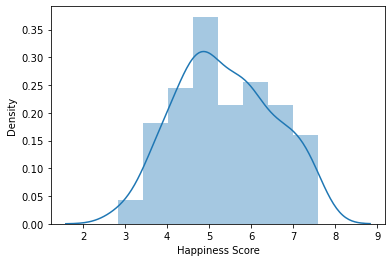

In [9]:
sns.distplot(df["Happiness Score"])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

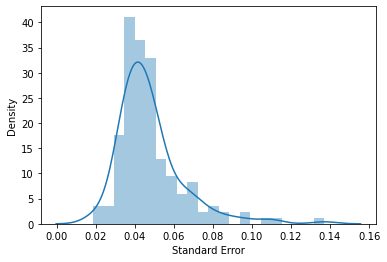

In [10]:
sns.distplot(df["Standard Error"])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

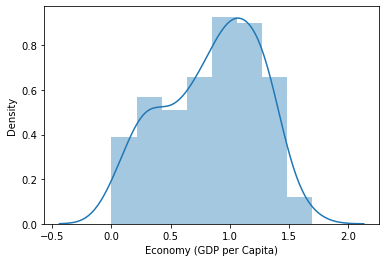

In [11]:
sns.distplot(df["Economy (GDP per Capita)"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

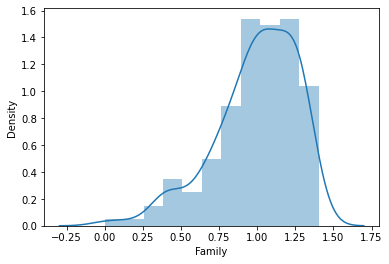

In [12]:
sns.distplot(df["Family"])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

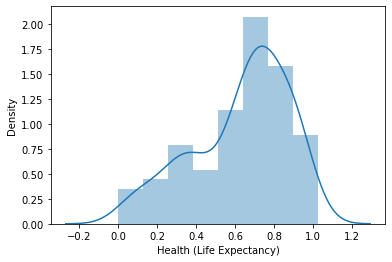

In [13]:
sns.distplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

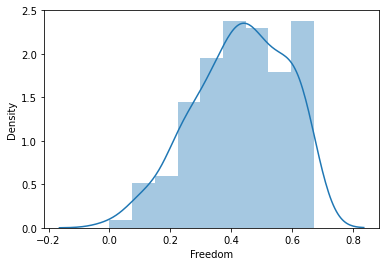

In [14]:
sns.distplot(df["Freedom"])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

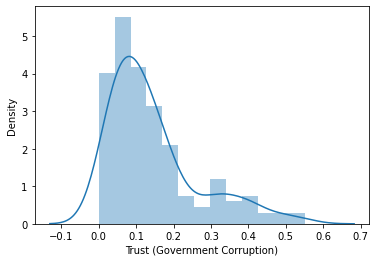

In [15]:
sns.distplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

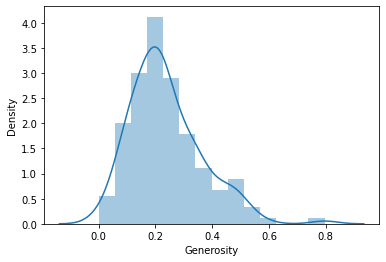

In [16]:
sns.distplot(df["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

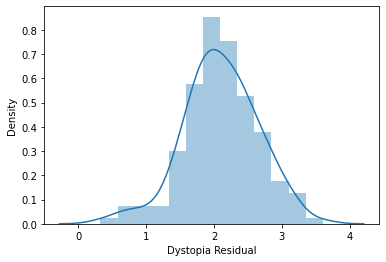

In [17]:
sns.distplot(df["Dystopia Residual"])

All independent variables have skewnesss and need to be handled

### BoxPlot for checking Outliers

<AxesSubplot:xlabel='Happiness Score'>

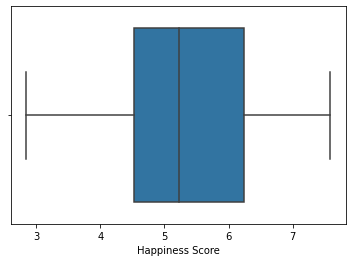

In [18]:
sns.boxplot(df["Happiness Score"])

<AxesSubplot:xlabel='Standard Error'>

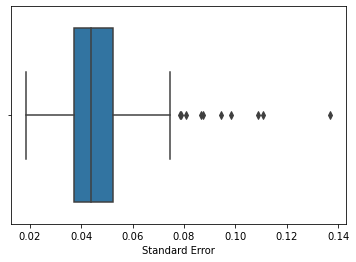

In [19]:
sns.boxplot(df["Standard Error"])

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

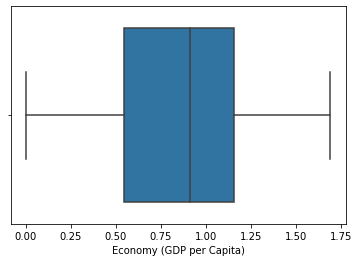

In [20]:
sns.boxplot(df["Economy (GDP per Capita)"])

<AxesSubplot:xlabel='Family'>

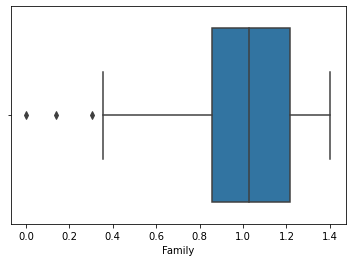

In [21]:
sns.boxplot(df["Family"])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

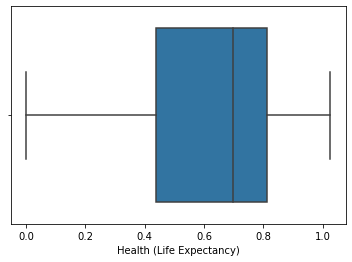

In [22]:
sns.boxplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Freedom'>

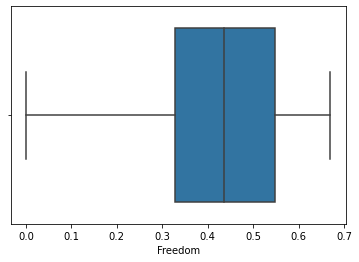

In [23]:
sns.boxplot(df["Freedom"])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

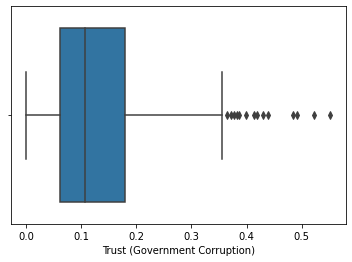

In [24]:
sns.boxplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity'>

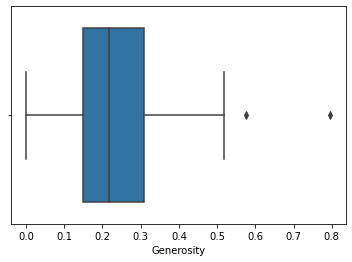

In [25]:
sns.boxplot(df["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual'>

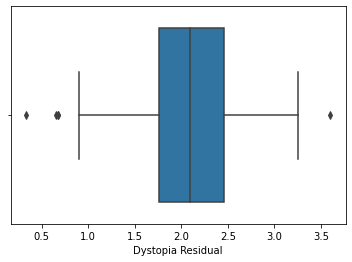

In [26]:
sns.boxplot(df["Dystopia Residual"])

Standard Error, Family, Trust (Government Corruption), Genorisity and Dystopia Residual have outliers and need to be handled

### Encoding of the DataFrame

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [28]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [29]:
df.dtypes

Country                          float64
Region                           float64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [30]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Multivariate Analysis

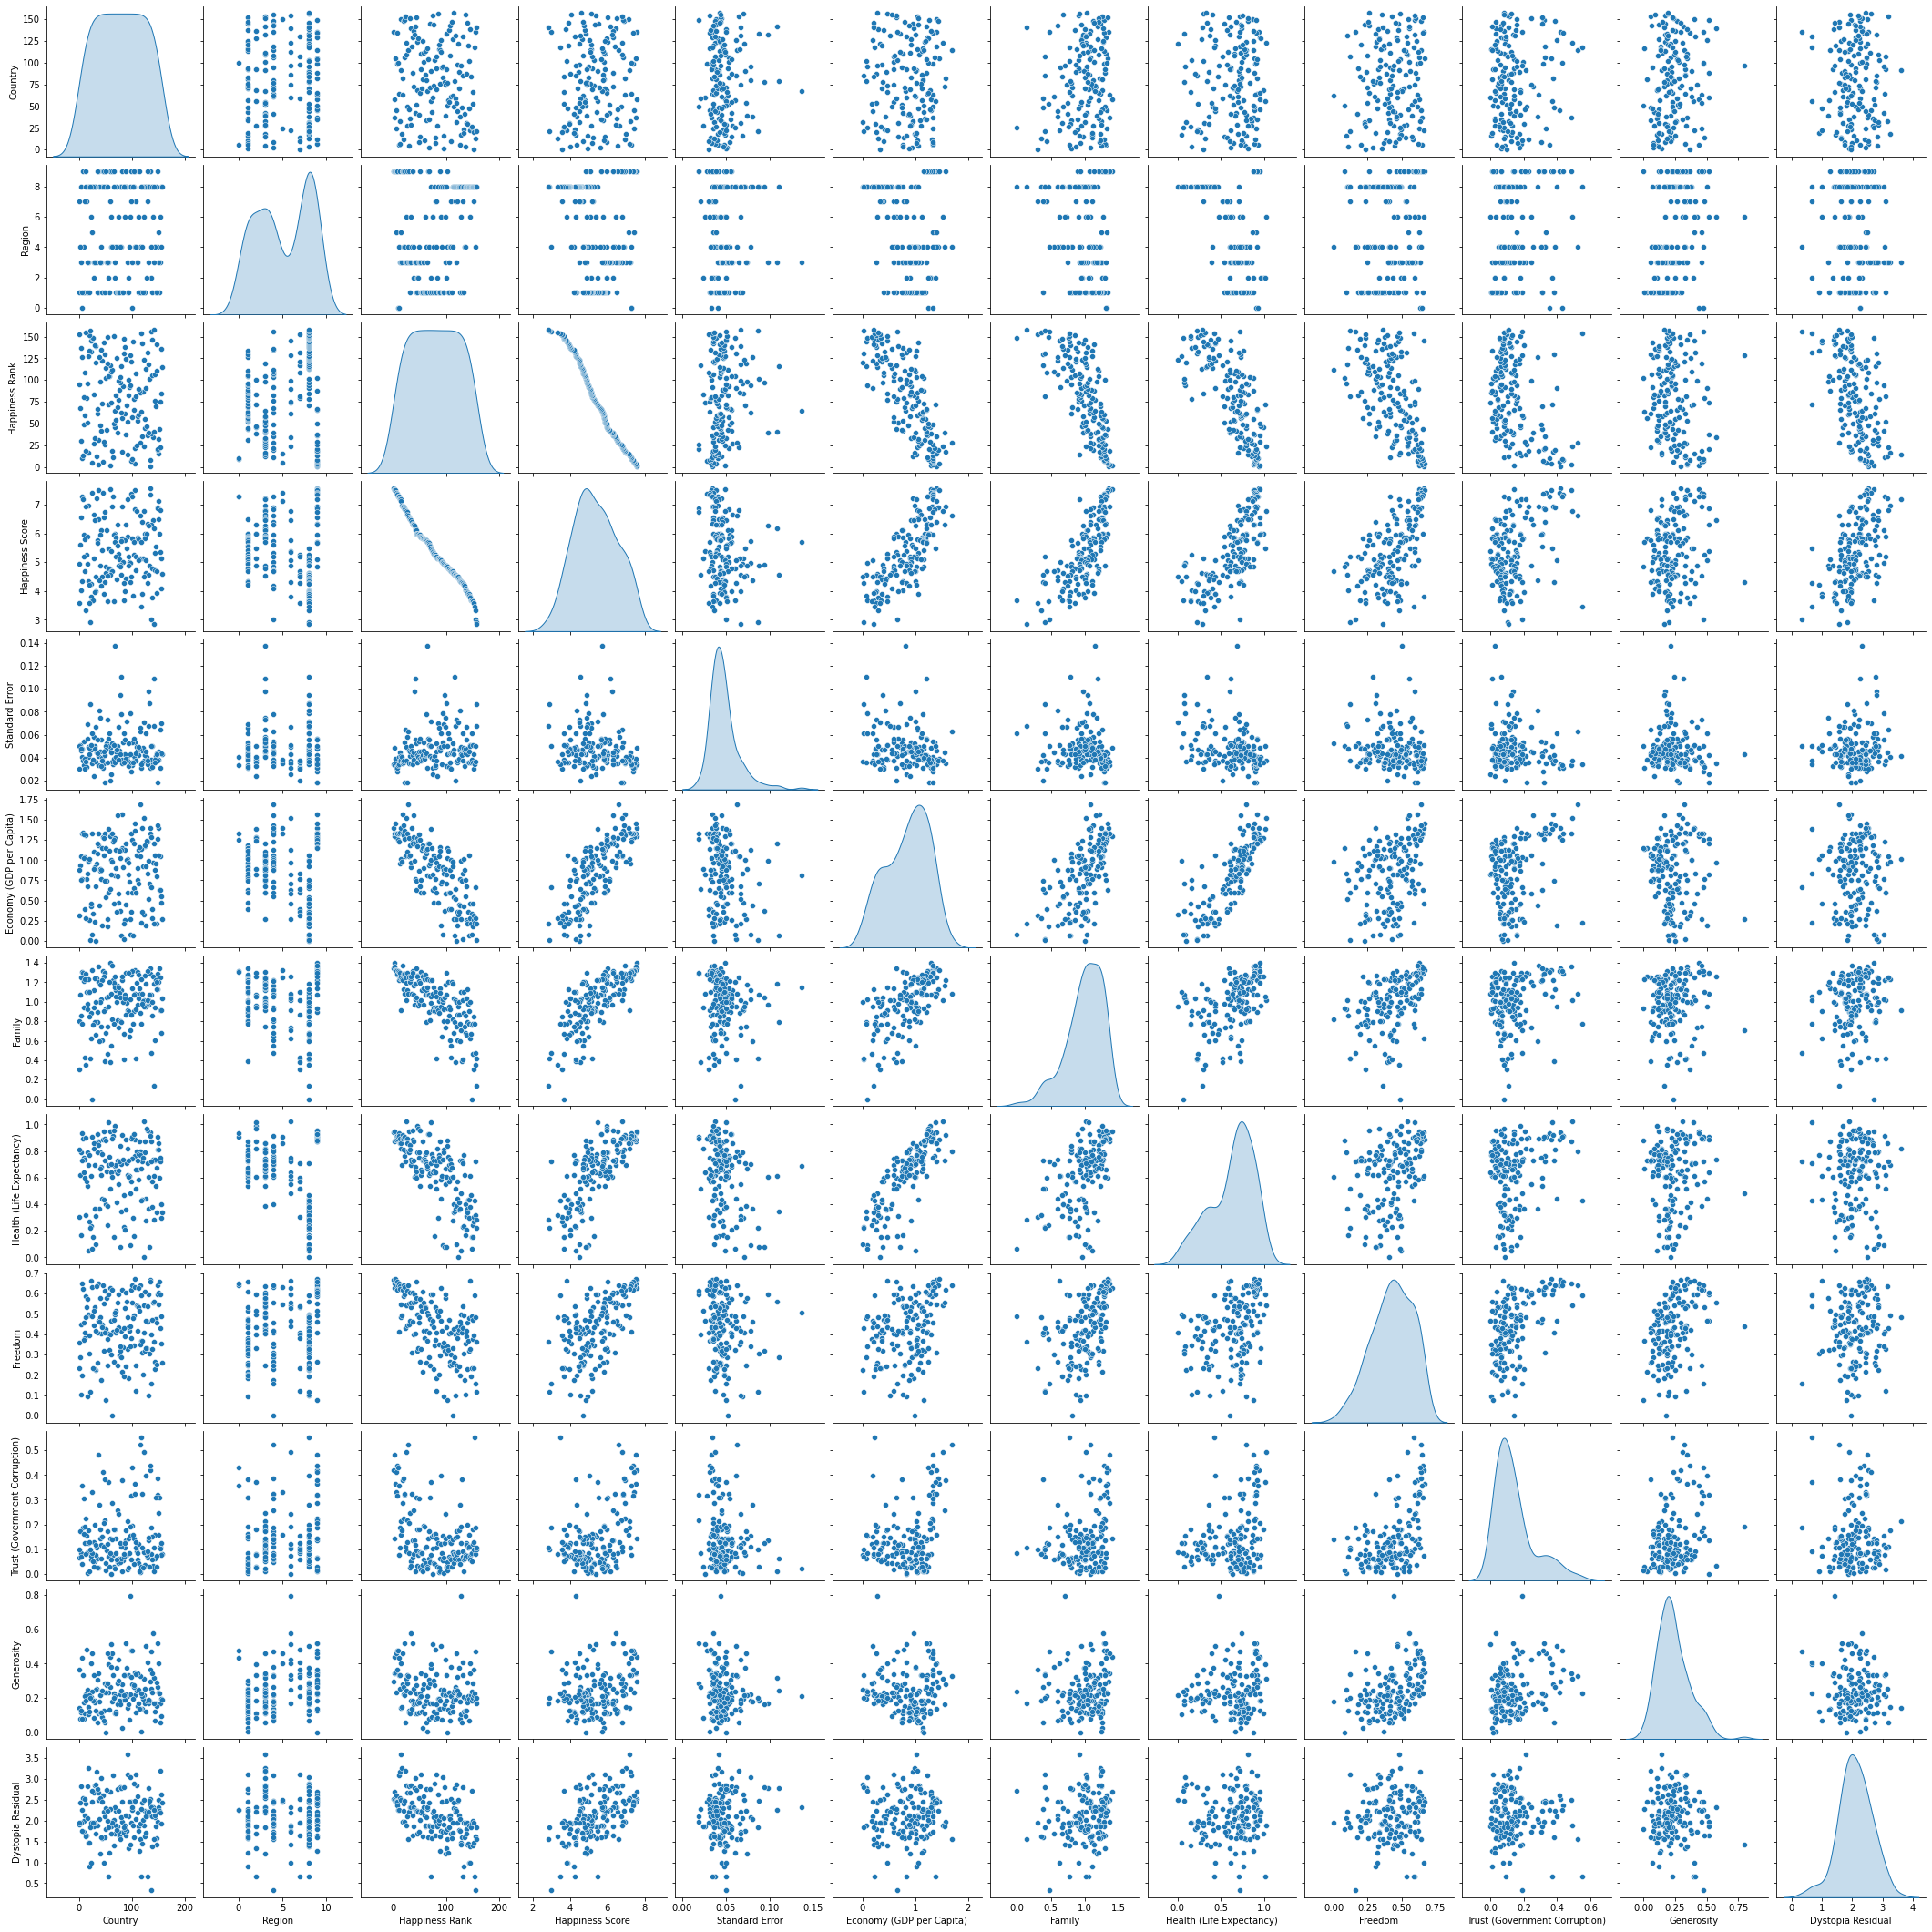

In [31]:
sns.pairplot(df, diag_kind="kde")

<AxesSubplot:title={'center':'Comparison between Happiness Score and Economy '}, xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

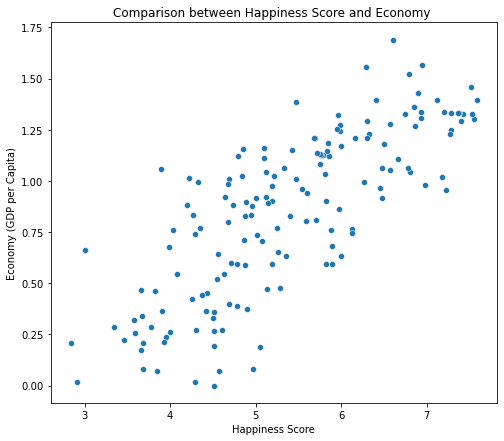

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,7])
plt.title('Comparison between Happiness Score and Economy ')
sns.scatterplot(df['Happiness Score'],df['Economy (GDP per Capita)'])

<AxesSubplot:title={'center':'Comparison between Economy (GDP per Capita) and Family '}, xlabel='Economy (GDP per Capita)', ylabel='Family'>

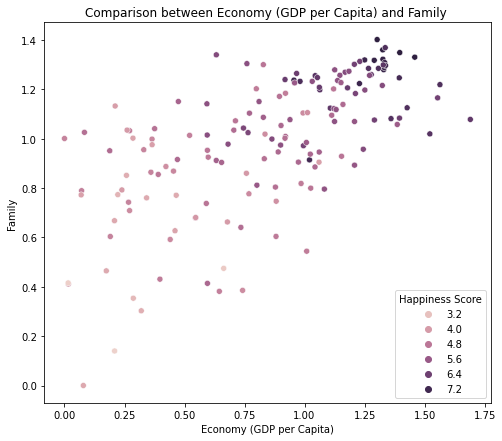

In [33]:
plt.figure(figsize=[8,7])
plt.title('Comparison between Economy (GDP per Capita) and Family ')
sns.scatterplot(df['Economy (GDP per Capita)'],df['Family'],hue=df['Happiness Score'])

<AxesSubplot:title={'center':'Comparison between Health and Family '}, xlabel='Health (Life Expectancy)', ylabel='Family'>

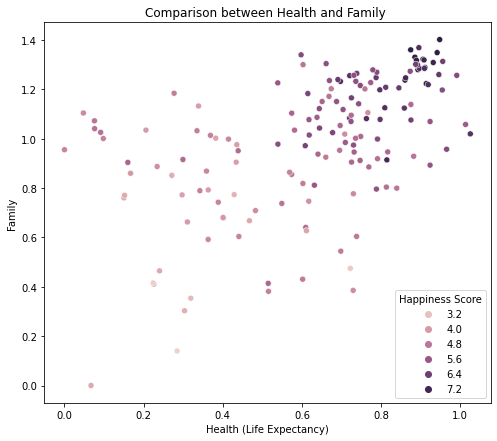

In [34]:
plt.figure(figsize=[8,7])
plt.title('Comparison between Health and Family ')
sns.scatterplot(df['Health (Life Expectancy)'],df['Family'],hue=df['Happiness Score'])

<AxesSubplot:title={'center':'Freedom  and Trust (Government Corruption)'}, xlabel='Trust (Government Corruption)', ylabel='Freedom'>

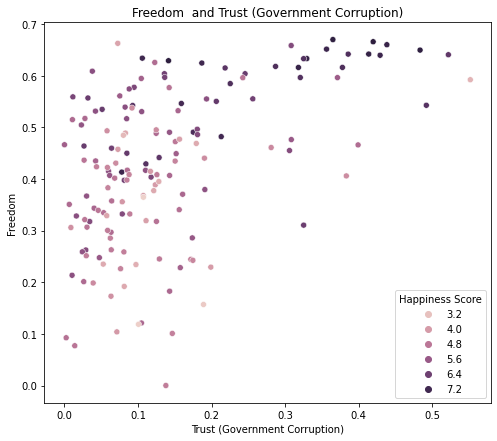

In [35]:
plt.figure(figsize=[8,7])
plt.title('Freedom  and Trust (Government Corruption)')
sns.scatterplot(df['Trust (Government Corruption)'],df['Freedom'],hue=df['Happiness Score'])

### Checking Collinearity

In [36]:
cor=df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

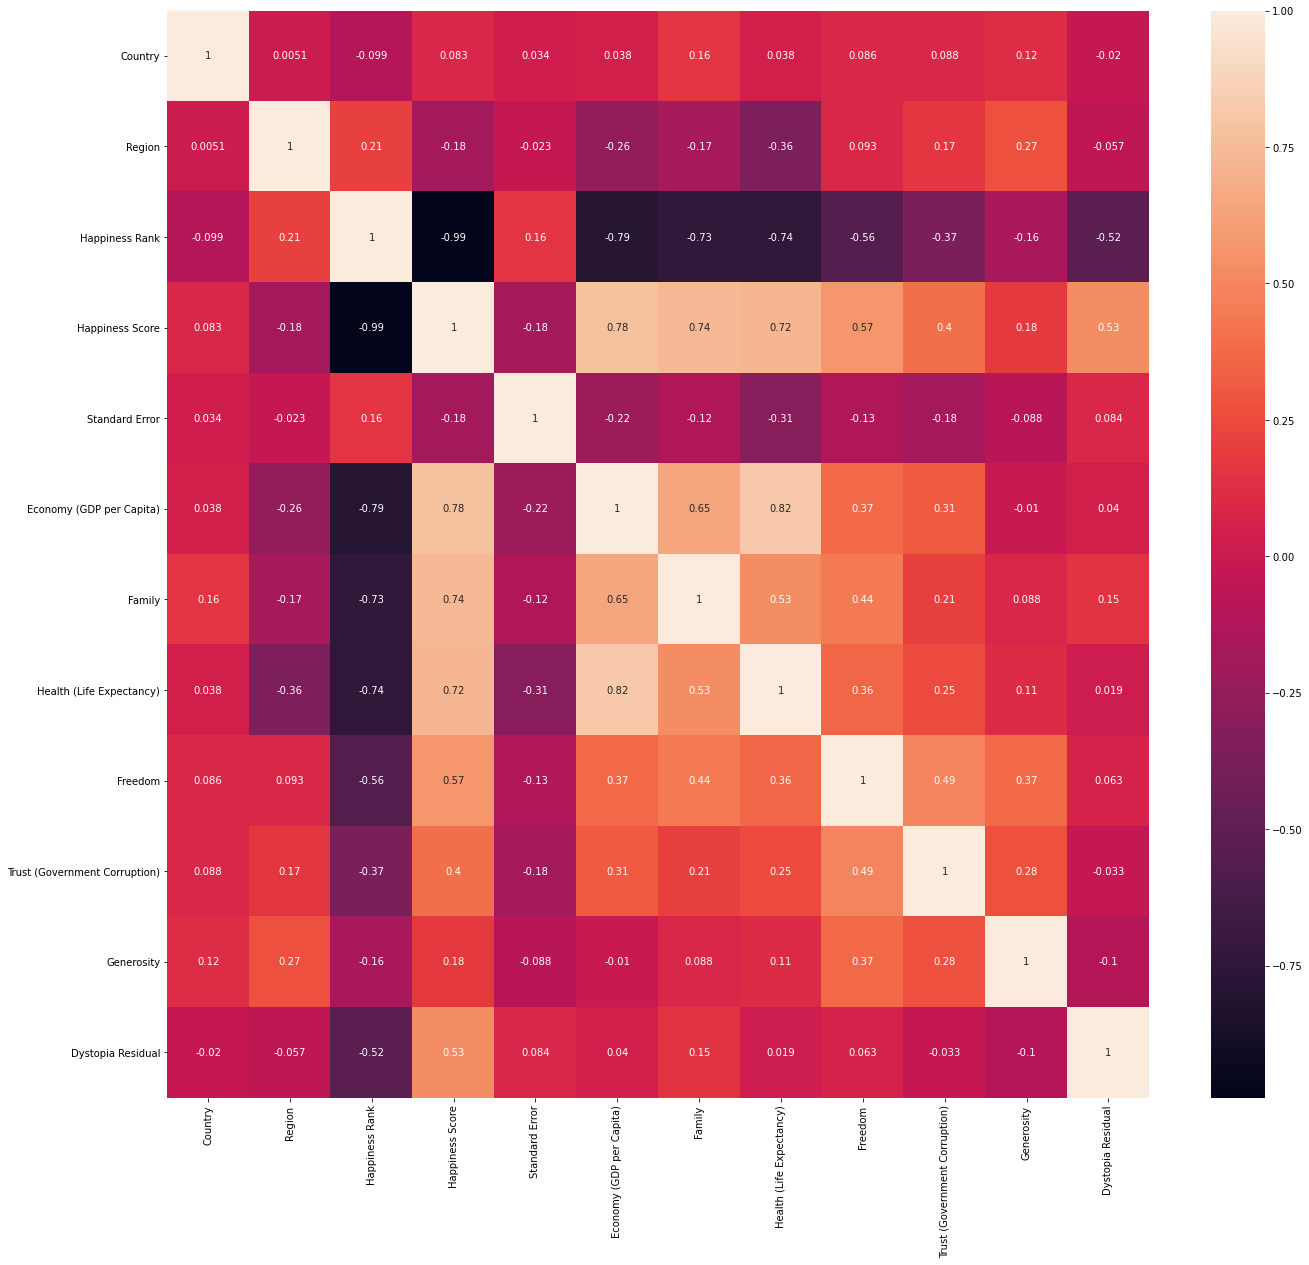

In [37]:
fig, ax_size = plt.subplots(figsize=(22,20))
sns.heatmap(cor,annot=True,ax=ax_size)

Checking the columns which are positively and negatively corelated with target variable

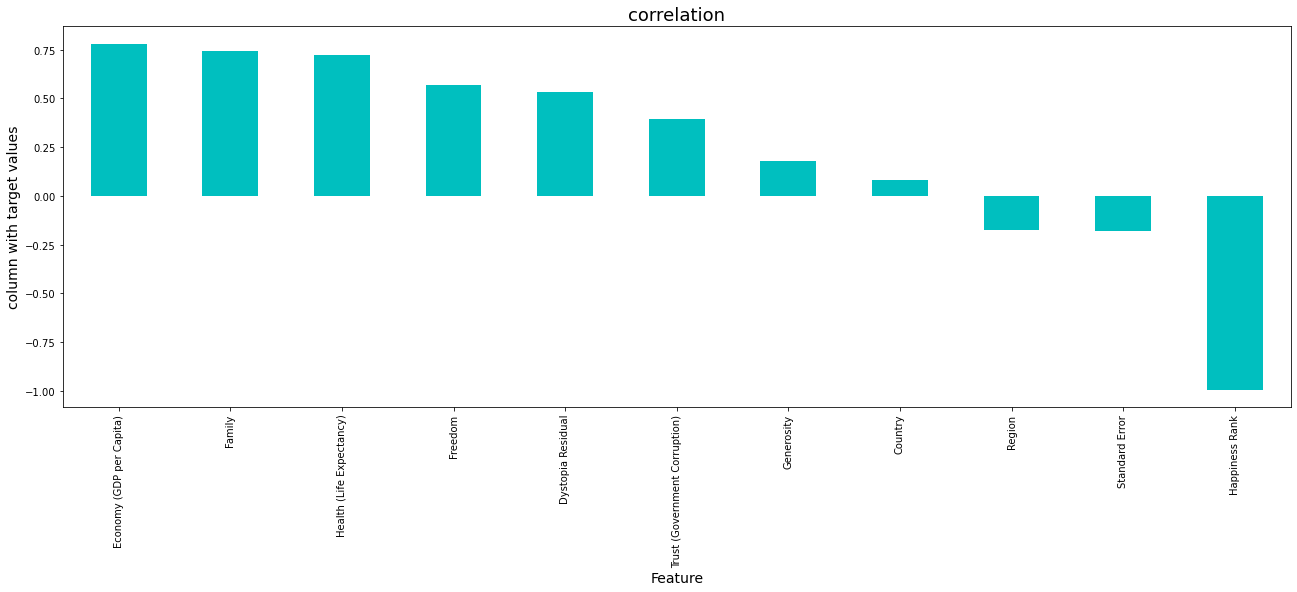

In [38]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target values',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Variance Inflation Factor to find multi collinearity

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [41]:
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                              for i in range(len(df.columns))]
print(vif_data)

                          feature           VIF
0                         Country  4.234664e+00
1                          Region  5.724189e+00
2                  Happiness Rank  5.220781e+00
3                 Happiness Score  4.146743e+08
4                  Standard Error  1.001791e+01
5        Economy (GDP per Capita)  1.205059e+07
6                          Family  1.449843e+07
7        Health (Life Expectancy)  6.284665e+06
8                         Freedom  2.830796e+06
9   Trust (Government Corruption)  4.790255e+05
10                     Generosity  9.925277e+05
11              Dystopia Residual  6.467982e+07


Since Generosity has value near to 10 we shall dropping this column

In [42]:
df.drop(['Generosity'],axis=1,inplace=True)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


In [43]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Dystopia Residual               -0.238911
dtype: float64

### Outliers Removal

In [44]:
df.shape

(158, 11)

In [45]:
from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1) ]

In [46]:
new_df.shape

(150, 11)

In [47]:
# data loss check
DL = ((158-150)/158)*100
DL

5.063291139240507

### Splitting the data into x and y

In [49]:
x=new_df.drop("Happiness Score",axis=1)
y=new_df["Happiness Score"]

### Scaling the data using Min-Max Scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
lr.score(x_train,y_train)

0.9940681842488167

In [89]:
lr.coef_

array([ 6.68745647e-05,  7.88685058e-03, -1.10944310e-02, -1.13092138e+00,
        4.68026657e-01,  5.94547215e-01,  6.04100668e-01,  6.27098239e-01,
        8.16660058e-01,  5.35303858e-01])

### Regularization

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.linear_model import Lasso,Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [74]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9940012647104508

In [75]:
ls.coef_

array([ 6.41287887e-05,  8.54971831e-03, -1.16736479e-02, -4.09535974e-01,
        4.47166696e-01,  5.66279820e-01,  5.93417681e-01,  6.09122979e-01,
        7.87781306e-01,  5.11656843e-01])

In [73]:
# try to minimize the coefficient variance

rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9940681789342256

In [68]:
rd.coef_

array([ 6.68783287e-05,  7.89315083e-03, -1.10970839e-02, -1.12397968e+00,
        4.67920246e-01,  5.94397814e-01,  6.04151171e-01,  6.27087791e-01,
        8.16492526e-01,  5.35194804e-01])

In [69]:
# ElasticNet

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))

0.9940268375072304


In [70]:
enr.coef_

array([ 6.46933183e-05,  8.41724946e-03, -1.15551281e-02, -5.66472009e-01,
        4.51779116e-01,  5.71976967e-01,  5.95170497e-01,  6.12949649e-01,
        7.92422107e-01,  5.16536583e-01])

### Support Vector Regression

In [76]:
from sklearn.svm import SVR


svr = SVR(kernel = "linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr = SVR(kernel = "poly")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr = SVR(kernel = "rbf")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [77]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9928894213487385
0.8354226915791072
0.9836698826731233


### Applying Ensemble Technique

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [90]:
rf= RandomForestRegressor(criterion="mse", max_features ="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

R2 Score: 99.81356839560166


In [81]:
train, validation = train_test_split(new_df, test_size=0.50, random_state = 5)

### Validating with samples

In [107]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=10, n_features=11, n_informative=6, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestRegressor()

In [108]:
import pickle
filename = 'happyindex.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [109]:
loaded_model = pickle.load(open('happyindex.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9981356839560166


In [110]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Actual"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Predicted,5.06531,4.62874,7.21971,4.96584,5.87664,5.75001,5.33894,5.46147,6.09903,5.80063,...,4.77239,4.05063,4.26484,6.79184,5.73894,7.46137,4.86416,5.01881,5.25068,4.49956
Actual,5.06531,4.62874,7.21971,4.96584,5.87664,5.75001,5.33894,5.46147,6.09903,5.80063,...,4.77239,4.05063,4.26484,6.79184,5.73894,7.46137,4.86416,5.01881,5.25068,4.49956


In [ ]:
Predicted = Actual